# Task 1: Prediction using Supervised Machine Learning

**GRIP @ The Sparks Foundation**

In this regression task, I will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.


**Technical Stack:**  
- Scikit Learn
- NumPy Array
- Pandas
- Matplotlib


In [1]:
# Importing the required libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Step 1 - Reading the data from source


In [16]:
# Reading data from remote link
url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data_1 = pd.read_csv(url)
print("Data Import Successful")

data_1.head(10)

Data Import Successful


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [17]:
print(len(data_1))

25


## Step 2 - Input data Visualization

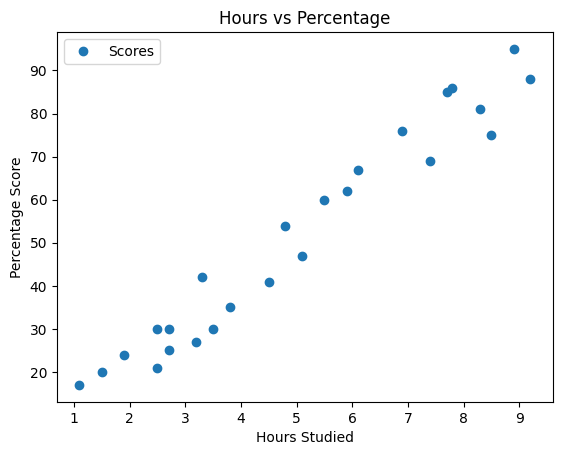

In [19]:
data_1.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

##### From the graph we can assume a positive linear relation between the number of hours studied and percentage of score.



## Step 3 - Data Preprocessing

#### This step involved division of data into "attributes" (inputs) and "labels" (outputs).

In [20]:
#X: a NumPy array containing all rows and all columns of data_1 except the last column.
#y: a NumPy array containing the values from the second column of data_1.

X = data_1.iloc[:, :-1].values  
y = data_1.iloc[:, 1].values 

## Step 4 - Model Training

#### Splitting the data into training and testing sets, and training the algorithm.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 

print("Training is complete.")

Training is complete.


## Step 5 - Plotting the Line of regression

#### Now since our model is trained now, its the time to visualize the best-fit line of regression

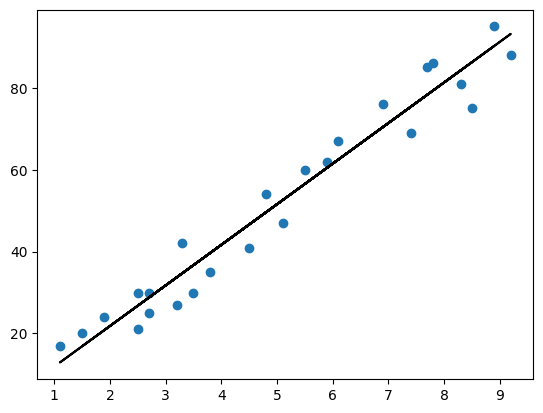

In [22]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='black')
plt.show()

## Step 6 - Making Predictions

#### Algrotihms are trained, it's time to test the model by making some predictions.
#### For this we will use our test-set data

In [23]:
print("X_test")
print(X_test)

print("y_test")
print(y_test)

y_pred = regressor.predict(X_test)

print("Y Pred")
print(y_pred)

X_test
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
y_test
[20 27 69 30 62]
Y Pred
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


## Step 7 - Comparing Actual result to the Predicted Model result

####  Objective: To compare the actual results with predicted model results.

In [9]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105355


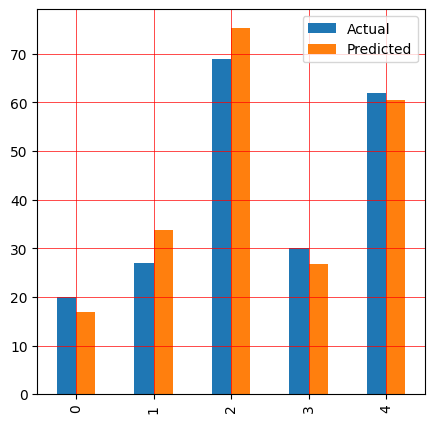

In [11]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [14]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
mypred = regressor.predict(test)
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(mypred[0]))

Number of Hours = 9.25
Predicted Score = 93.69173248737535


## Step 8 - Evaluating the model

#### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
R-2: 0.9454906892105355
